In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing dataset
dataset_train=pd.read_csv('mnist_train.csv') # has 10 classes-- 0 to 9 digits and labels
dataset_test=pd.read_csv('mnist_test.csv')
print("Shape of training dataset:",dataset_train.shape)
print("Shape of testing dataset:",dataset_test.shape)

Shape of training dataset: (60000, 785)
Shape of testing dataset: (10000, 785)


In [3]:
print("Description of training dataset:",dataset_train.describe())
print("Description of test dataset:",dataset_test.describe())

Description of training dataset:               label      1x1      1x2      1x3      1x4      1x5      1x6  \
count  60000.000000  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       4.453933      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.889270      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

           1x7      1x8      1x9  ...         28x19         28x20  \
count  60000.0  60000.0  60000.0  ...  60000.000000  60000.000000   
mean       0.0      0.0      0.0  ...      0.200433      0.088867   
std        0.0      0.0      0.0  ...      6.042472      3.956189 

In [4]:
#checking for null and np.nan values
print("Null values in training dataset:",dataset_train.isnull().sum().head(10))
print("Null values in test dataset:",dataset_test.isnull().sum().head(10))

Null values in training dataset: label    0
1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
1x6      0
1x7      0
1x8      0
1x9      0
dtype: int64
Null values in test dataset: label    0
1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
1x6      0
1x7      0
1x8      0
1x9      0
dtype: int64


In [5]:
order = list(np.sort(dataset_train['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

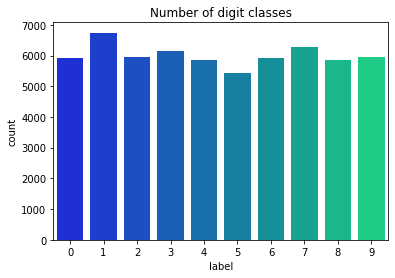

In [6]:
## Visualizing the number of class ie digits and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( dataset_train["label"], palette = 'winter')
plt.title('Number of digit classes')
dataset_train.label.value_counts() 
#count the number of classes ie digits from 0-9 to idrentify any biasing towards a class by occurence/frequency

In [7]:
# Plotting some samples as well as converting into matrix
'''four = dataset_train.iloc[3, 1:] #1st column is the label column at index 0
print(four.shape)
four = four.values.reshape(28,28)
# opening image in bigger size than allowed on canvas by default on notebook
fig=plt.figure(figsize=(14,12)) # by adjusting fgsize dimensions, open image in bigger size
ax=fig.add_subplot(111) # by adjusting size of width,height and color channel
ax.imshow(four)
plt.imshow(four, cmap='gray') # to remove color channel from input image
plt.title("Digit 4")
four'''

'four = dataset_train.iloc[3, 1:] #1st column is the label column at index 0\nprint(four.shape)\nfour = four.values.reshape(28,28)\n# opening image in bigger size than allowed on canvas by default on notebook\nfig=plt.figure(figsize=(14,12)) # by adjusting fgsize dimensions, open image in bigger size\nax=fig.add_subplot(111) # by adjusting size of width,height and color channel\nax.imshow(four)\nplt.imshow(four, cmap=\'gray\') # to remove color channel from input image\nplt.title("Digit 4")\nfour'

In [8]:
# average feature values
round(dataset_train.drop('label', axis=1).mean(), 2) 
#drop label column of dataset while calculating mean of all other columns rounded off upto 2nd decimal place

1x1      0.0
1x2      0.0
1x3      0.0
1x4      0.0
1x5      0.0
        ... 
28x24    0.0
28x25    0.0
28x26    0.0
28x27    0.0
28x28    0.0
Length: 784, dtype: float64

In [9]:
# Separating the X and Y variable

y_dataset_train = dataset_train['label']
# Dropping the variable 'label' from X variable 
X_dataset_train = dataset_train.drop(columns = 'label') #drop  labels column at index 0
# Printing the size of data 
print(X_dataset_train.shape)
print(y_dataset_train.shape)

(60000, 784)
(60000,)


In [10]:
# Normalization-- all values lie between 0 and 255 so by dividing all values by 255, they will lie between 0 and 1
X_dataset_train = X_dataset_train/255.0
dataset_test = dataset_test/255.0
print("X:",X_dataset_train.shape)
print("Test dataset:",dataset_test.shape)

X: (60000, 784)
Test dataset: (10000, 785)


In [11]:
from sklearn.preprocessing import MinMaxScaler
#feature scaling independent feature variable X
mm_X = MinMaxScaler()
X_dataset_train = mm_X.fit_transform(X_dataset_train)

#splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_dataset_train, y_dataset_train, test_size = 0.2,random_state = 0)

In [12]:
# Applying SVM model to training dataset
from sklearn.svm import SVC
classifier=SVC(kernel='rbf') #hyperparameter tuning c and gamma values
#linear kernel only gives 91.8% accuracy
#polynomial kernel with degree=3 gives 86% accuracy
#sigmoid kernel gives 91.1% accuracy
#rbf kernel gives 97.816% accuracy so i used rbf kernel
model = classifier.fit(X_train,y_train)

In [20]:
#Predicting results of training dataset
y_pred=classifier.predict(X_test)
print("Predicted output values:",y_pred)

Predicted output values: [3 6 6 ... 5 1 6]


In [21]:
y_pred.flatten()

array([3, 6, 6, ..., 5, 1, 6], dtype=int64)

In [22]:
y_pred.shape

(12000,)

In [23]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix

accuracy=metrics.accuracy_score(y_true=y_test, y_pred=y_pred)*100
print("Accuracy:", accuracy, "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# CALCULTING ERROR AND ACCURACY OF PREDICTION MODEL
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:',mse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error:',mae)
r_score = r2_score(y_test, y_pred)
print('Accuracy:',r_score*100)

Accuracy: 97.81666666666666 

[[1195    0    0    0    0    2    6    0    2    0]
 [   0 1372    2    1    2    0    1    0    0    1]
 [   0    1 1142    5    4    1    1    6    5    1]
 [   0    0    9 1169    0   14    0    4   12    0]
 [   0    2    2    0 1132    0    3    4    1    9]
 [   5    0    3   12    4 1035    8    0    5    3]
 [   2    2    3    0    3    5 1173    0    2    0]
 [   0    2    8    1    5    0    1 1199    1   11]
 [   1    5    5    2    2    8    4    0 1161    3]
 [   1    0    0    6   17    5    0   10    6 1160]]
Mean squared error: 0.3388333333333333
Mean absolute error: 0.0755
Accuracy: 95.98114200470734


In [ ]:
import joblib
joblib.dump(model,"model.pkl")